## First we start by importing the required libraries


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Next we load our datasets

In [86]:
train = pd.read_csv("/Users/USER/Documents/DataScienceNigeria/Data Science Hackathon Qualification/train.csv")
test = pd.read_csv("/Users/USER/Documents/DataScienceNigeria/Data Science Hackathon Qualification/test.csv")
# sample_submission = pd.read_csv("/Users/USER/Documents/DataScienceNigeria/Data Science Hackathon Qualification/SampleSubmission.csv")

Let us now see the shape of our datasets


In [87]:
print("The shape of our train data is :", train.shape)
print("The shape of our test data is: ", test.shape)
# print("The shape of our sample submision data is: ", sample_submission.shape)

The shape of our train data is : (1568, 27)
The shape of our test data is:  (672, 26)


WE can see that our train data contains 27 columns and 1568 rows

Let us now inspect the columns of our datasets


In [88]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [89]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [90]:
#Create submission file using an empty/dummy dataframe
submission = pd.DataFrame(columns=['ID', 'Response'])
submission.head() 

,ID,Response


In [91]:
#Save test ID in a copy for creating submission file later
submission.ID = test.ID
submission.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [12]:
submission.shape

(672, 2)

We want to now get some information about the features using the pandas **info()** method

## Exploratory data Analysis

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [93]:
# Let us now check for missing values
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [94]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

We see that the train data contains 16 missing values while the test data contains 8 missing values

In [95]:
# let us now check for the data types in the train and test data

train.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [96]:
test.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
dtype: object

We have 3 categorical features aside the ID columns, and 22 numerical features aside the target column 

**We now want to drop the ID columns in the train and test data as we wont need them for modelling. We will also drop the date_customer column as this is not a good predictor of a customer response to marketing campaign**

In [97]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)
train.drop('Date_Customer', axis=1, inplace=True)
test.drop('Date_Customer', axis=1, inplace=True)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

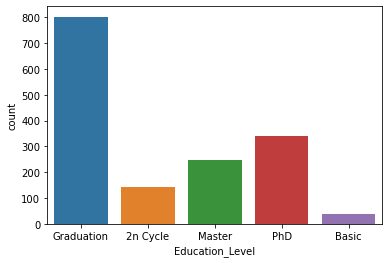

In [20]:
sns.countplot(x= "Education_Level", data= train)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

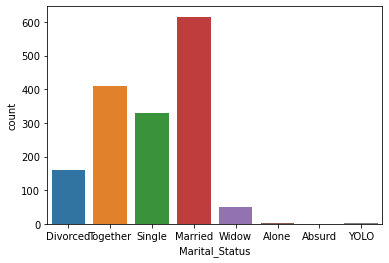

In [21]:
sns.countplot(x= "Marital_Status", data= train)

<AxesSubplot:xlabel='Response', ylabel='count'>

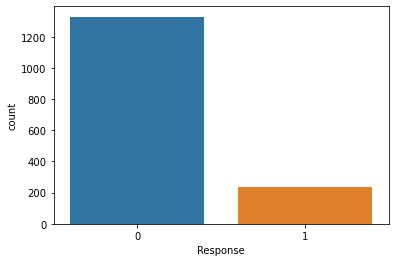

In [98]:
sns.countplot(x="Response", data= train)

In [7]:
train['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

From the above Visualization, we noticed an imbalanced dataset. so lets try installing the imblearn module for balancing our dataset later on.

In [ ]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\USER\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_2         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
Note: you may need to restart the kernel to use updated packages.


The following packages will be UPDATED:

  conda                               4.10.3-py38haa244fe_0 --> 4.10.3-py38haa244fe_2




imbalanced-learn-0.7 | 97 KB     |            |   0% 
imbalanced-learn-0.7 | 97 KB     | #6   

**From the univariate analysis, above we noticed that in the Educational_Level feature most participants were graduates, while the least participant had basic education.
Also, in the Marital_Status feature, the most particpant were married, while the least participant were absurd**

**Additionally, 1329 participant did not respond to the marketing campaign, while 239 participant did respond to the campaign**

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

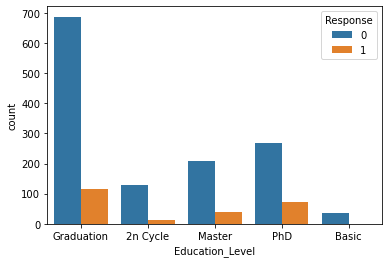

In [24]:
# Let us now explore the Educational_Status agaisnt the Response
sns.countplot(x="Education_Level", hue="Response", data= train)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

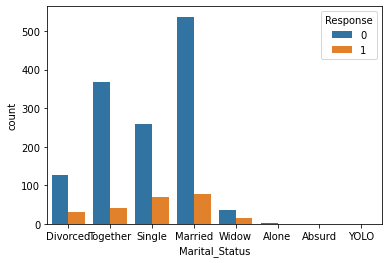

In [25]:
#let us explore Marital_Status against the Response
sns.countplot(x="Marital_Status", hue="Response", data= train)

### Filling Missing Values

We want to now fill in the missing values using the mean

In [99]:
train['Disposable_Income'].fillna((train['Disposable_Income'].mean()) , inplace = True)

In [100]:
train.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [101]:
test['Disposable_Income'].fillna((test['Disposable_Income'].mean()) , inplace = True)

In [102]:
test.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

### Encoding Categorical Variables 

Before we move forward with the encoding, let us separate the categorical variables from the numerical


In [103]:
categorical_data = train.select_dtypes(exclude=[np.number])
numeric_data = train.select_dtypes(include=[np.number])

In [ ]:
# Lets confirm our categorical data

In [104]:
categorical_data

,Education_Level,Marital_Status
0,Graduation,Divorced
1,Graduation,Together
2,Graduation,Single
3,2n Cycle,Single
4,Graduation,Married
...,...,...
1563,Graduation,Married
1564,Graduation,Single
1565,Master,Married
1566,PhD,Single


In [105]:
numeric_data

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,77504.4,1,1,56,2,1,1,4,71,...,6,20,3,0,0,0,0,0,0,0
1,1958,56784.0,0,1,17,6,5,1,8,205,...,15,19,6,0,0,0,0,0,0,0
2,1962,103714.8,0,0,17,0,7,4,7,469,...,18,37,2,0,0,0,1,0,0,1
3,1979,46311.6,1,0,49,3,4,1,3,56,...,24,24,8,0,0,0,0,0,0,0
4,1959,87486.0,0,0,59,1,3,7,9,412,...,165,203,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970,52893.6,1,1,24,2,2,0,3,29,...,0,4,5,0,0,0,0,0,0,0
1564,1980,74190.0,0,1,63,1,4,2,8,167,...,30,27,4,0,0,0,0,0,0,0
1565,1952,80857.2,0,1,74,4,2,2,9,820,...,0,70,7,0,1,0,0,0,0,0
1566,1964,58701.6,1,1,28,2,1,0,4,57,...,0,1,4,0,0,0,0,0,0,0


In [106]:
# We now proceed with encoding the categorical variables.

from sklearn.preprocessing import LabelEncoder,OneHotEncoder, OrdinalEncoder


In [107]:
label_encoder = LabelEncoder()
for i in categorical_data:
    train[i] = label_encoder.fit_transform(train[i])
    test[i] = label_encoder.transform(test[i])

In [108]:
# Let us check it out

train.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,2,2,77504.4,1,1,56,2,1,1,...,6,20,3,0,0,0,0,0,0,0
1,1958,2,5,56784.0,0,1,17,6,5,1,...,15,19,6,0,0,0,0,0,0,0
2,1962,2,4,103714.8,0,0,17,0,7,4,...,18,37,2,0,0,0,1,0,0,1
3,1979,0,4,46311.6,1,0,49,3,4,1,...,24,24,8,0,0,0,0,0,0,0
4,1959,2,3,87486.0,0,0,59,1,3,7,...,165,203,1,0,0,0,1,0,0,0


In [109]:
test.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1954,2,4,48556.8,0,1,85,6,8,2,...,7,23,41,8,0,0,0,0,0,0
1,1961,2,6,57499.2,0,1,79,5,7,4,...,0,0,75,6,0,1,0,0,0,0
2,1973,1,3,17025.6,0,0,47,1,2,0,...,16,12,27,6,0,0,0,0,0,0
3,1970,2,5,91983.6,0,0,98,1,4,7,...,219,189,126,2,0,0,1,1,0,0
4,1959,2,5,78235.2,0,2,41,2,7,6,...,12,0,200,5,1,0,0,0,0,0


nice one!

#### Split the dataset into Features (Independent) and Target (dependent)

In [110]:
from sklearn import metrics # for model evaluation
from sklearn.model_selection import train_test_split # to divide the data in training and test set

In [111]:
# Split train into X (Features) and y (Target)

X = train.drop('Response', axis=1)
y = train.Response

<u1><li>**Split the data into training and test set**</li>
</u1>
We will split the dataset Features(X) and Label(Y) into training and test data. The training set will be 80% while the test set will be 20%

In [112]:
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Feature scaling

To normalize your data, you need to import the MinMaxScalar from the sklearn library and apply it to our dataset. So, let’s do that!

In [113]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range =(0,1))
X_train = scaler.fit_transform(X_train) # Fit and transform the training data
X_test = scaler.transform(X_test) # Transform the test data

In [60]:
# from sklearn.preprocessing import StandardScaler
# num_columns = numeric_data
# for i in num_columns:
#     scale = StandardScaler().fit(X_train)
#     X_train = scale.transform(X_train)
#     X_test = scale.transform(X_test)

#### Overcoming our imbalance class using SMOTE

In [61]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [63]:
# counter = Counter(y_train)
# print('Before', counter)

# Oversampling the train dataset
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

# counter = Counter(y_train)
# print('After', counter)

<u1><li>**Model Training**</li>
</u1>

We will use the training data to build the model and then use the test data to make prediction and evaluation respectively

## Logistic Regression

We want to now train a logistic model with our training data. But we need to first import the Logistic Regression from the sklearn modelling 

In [65]:
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [66]:
logisticmodel.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

That is what the model predicted for us. we will now save our result into the variable logistic_prediction

In [67]:
logistic_prediction = logisticmodel.predict(X_test)

<u1><li>**Model Evaluation**</li>
</u1>
We want to now evaluate our model using the classification matrix

In [68]:
def ConfusionMatrix(ytest, ypred, label = ["Accepted","Not Accepted"]):
    from sklearn.metrics import confusion_matrix
    c_matrix = confusion_matrix(ytest, ypred)
    plt.figure(figsize= (7,5))
    sns.heatmap(c_matrix, annot= True, cbar= False, fmt= "d", cmap= "Oranges", linewidths= .5)
    plt.xlabel("Actual", fontsize= 15)
    plt.xticks([0.5, 1.5], label)
    plt.ylabel("Predicted", fontsize= 15)
    plt.yticks([0.5, 1.5], label)
    plt.title("A confusion Matrix")

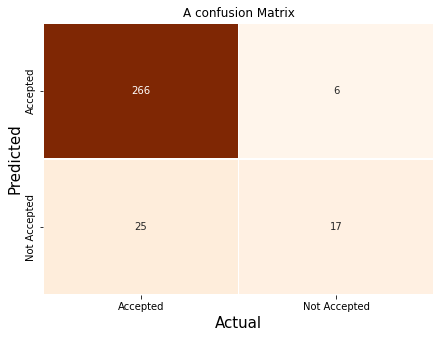

In [69]:
ConfusionMatrix(y_test, logistic_prediction, label= ["Accepted", "Not Accepted"])

In [70]:
metrics.accuracy_score(y_test, logistic_prediction)

0.9012738853503185

In [71]:
metrics.f1_score(y_test, logistic_prediction)

0.523076923076923

In [43]:
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,logistic_prediction,labels=[1,0])
print('Classification report : \n',matrix)


Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.43      0.51        42
           0       0.92      0.96      0.94       272

    accuracy                           0.89       314
   macro avg       0.78      0.70      0.73       314
weighted avg       0.88      0.89      0.88       314



Get the predicted result for the test data

In [ ]:
prediction1 = logisticmodel.predict(test)

In [ ]:
submission.Response = prediction1

In [ ]:
submission.to_csv("Prediction10.csv", index=False)

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
SVMmodel = SVC()
SVMmodel.fit(X_train, y_train)

SVC()

In [ ]:
SVMmodel_prediction = SVMmodel.predict(X_test)

In [ ]:
SVMmodel_prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

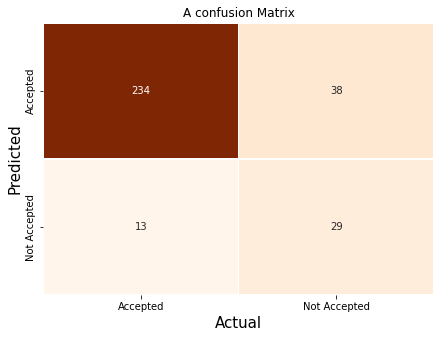

In [ ]:
ConfusionMatrix(y_test, SVMmodel_prediction, label= ["Accepted", "Not Accepted"])

In [ ]:
metrics.accuracy_score(y_test, SVMmodel_prediction)

0.8375796178343949

In [ ]:
metrics.f1_score(y_test, SVMmodel_prediction)

0.5321100917431193

In [ ]:
matrix = classification_report(y_test,SVMmodel_prediction,labels=[1,0])
print('Classification report : \n',matrix)


Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.69      0.53        42
           0       0.95      0.86      0.90       272

    accuracy                           0.84       314
   macro avg       0.69      0.78      0.72       314
weighted avg       0.88      0.84      0.85       314



In [ ]:
prediction_2 = SVMmodel.predict(test)

In [ ]:
submission.Responses = prediction_2

In [ ]:
submission.to_csv("My second Prediction.csv", index= False)

### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knmodel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knmodel.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
knmodel_prediction = knmodel.predict(X_test)

In [ ]:
knmodel_prediction

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

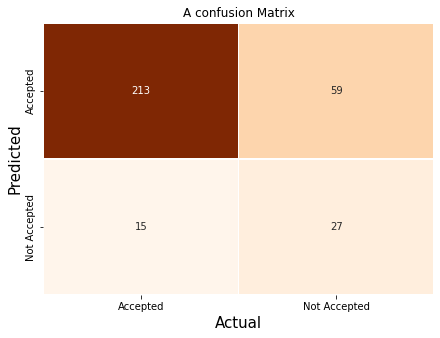

In [ ]:
ConfusionMatrix(y_test, knmodel_prediction, label= ["Accepted", "Not Accepted"])

In [ ]:
matrix = classification_report(y_test,knmodel_prediction,labels=[1,0])
print('Classification report : \n',matrix)


Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.64      0.42        42
           0       0.93      0.78      0.85       272

    accuracy                           0.76       314
   macro avg       0.62      0.71      0.64       314
weighted avg       0.85      0.76      0.79       314



In [ ]:
prediction_3 = knmodel.predict(test)

submission.Response = prediction_3

In [ ]:
submission.to_csv("My third submission.csv", index=False)

#### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rn_forest = RandomForestClassifier()

In [74]:
rn_forest.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
rn_forest_prediction = rn_forest.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print('Accuracy score:', accuracy_score(y_test, rn_forest_prediction))
print('F1 score:', f1_score(y_test, rn_forest_prediction))

Accuracy score: 0.8980891719745223
F1 score: 0.48387096774193544


In [ ]:
prediction_4 = rn_forest.predict(test)

In [ ]:
submission.Response = prediction_4

In [ ]:
submission.to_csv("prediction11.csv", index=False)

### XGBoost

In [ ]:
pip install xgboost

In [118]:
from xgboost import XGBClassifier

In [119]:
xg_model = XGBClassifier()

In [120]:
# define grid search
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__k': [10]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=45)
CV_xg = GridSearchCV(estimator=xg_model , param_grid=param_grid, n_jobs=-1, cv= cv, scoring='f1',error_score=0)
CV_xg.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (CV_xg.best_score_, CV_xg.best_params_))

KeyboardInterrupt: 

In [ ]:
#Predict with the best parameters
y_pred = CV_xg.predict(X_test)

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

In [ ]:
prediction_5 = CV_xg.predict(test)

In [61]:
submission.Response = prediction_5

In [62]:
submission.to_csv("New Submission.csv", index=False)

In [ ]:
%%capture
!pip install catboost

### CatBoost

In [ ]:

from catboost import CatBoostClassifier

In [ ]:
cat_model=CatBoostClassifier(learning_rate=0.15, n_estimators=1000,
                                                 subsample=0.085,
                                                 max_depth=5,
                                                 scale_pos_weight=2.5)

#Training Catboost Model on train set
cat_model.fit(X_train,y_train)

#Predictiing on Test Set
cat_model_prediction = cat_model.predict(X_test)
print('F1 score:', f1_score(y_test, cat_model_prediction))


In [ ]:
prediction_6 = cat_model.predict(test)

In [ ]:
submission.Response = prediction_6

In [ ]:
submission.to_csv("My prediction15.csv", index=False)

In [ ]:
%%capture
!pip install LightGBM

### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lg_model = LGBMClassifier(subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 400,
                                             boosting_type = 'dart',
                                             learning_rate=0.15,
                                             n_estimators=1000,
                                             max_depth=5,
                                             scale_pos_weight=2.5)

In [ ]:
lg_model.fit(X_train,y_train)

In [82]:
lg_model_prediction = lg_model.predict(X_test)

In [83]:
print('F1 score:', f1_score(y_test, lg_model_prediction))

F1 score: 0.4473684210526316


In [ ]:
prediction_7 = lg_model.predict(test)

In [ ]:
submission.Response = prediction_7

In [ ]:
submission.to_csv("Prediction16.csv", index=False)